# Titanic Dataset

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data at Random
There is absolutely no relationship between the data missing and any other values observed or missing with the dataset

In [8]:
# No of data missing in each attribute
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# To get the missing values in embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Missing Data not at random(MNAR):Systematic missing values
There is absolutely some relationship between the data missing and any other values observed or missing with the dataset

In [20]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

# Find the percentage of null values
df['cabin_null'].mean()*100

77.10437710437711

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [28]:
# Percentage of people who survived which had a cabin feature 
# which did not have
df.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

## All the technique of handling missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### Mean/Median/Mode imputation
**When should we apply?**
Mean/Median imputatoin has the assumption that the data are missing completely at random(MCAR).
We Solve this by replacing the NAN with the most frequent occurance of the variables

In [29]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [41]:
df.isnull().mean()*100

Survived       0.00000
Age           19.86532
Fare           0.00000
Age_median     0.00000
dtype: float64

In [31]:
# Fill NaN values in column with the median value
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [34]:
median=df['Age'].median()
median

28.0

In [35]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [42]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


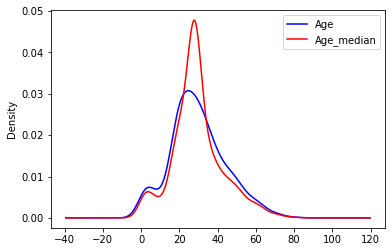

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
# Below is kernal Density estimator plot
# blue color line is real age value
# red line shows that since I have subs. NaN the median age 28
# There is a bigger pean in median age value
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='blue')
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages of Mean/Median Imputation
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages of Mean/Median Imputaiton
1. Distortion in original variance of data.
2. It impacts correlation